In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

#stat_file = "/home/kevin/Documents/master-thesis/logs/server_tests/denseddff_dif/test_stats/m94097_ddffnet_lstm_stack_pretrained_testset"
#stat_file = "/home/kevin/Documents/master-thesis/logs/server_tests/poolnet_dif/test_stats/m92652_poolnet_nopool_layered_testset"
#stat_file = "/home/kevin/Documents/master-thesis/logs/server_tests/pooldense_sim/test_stats/m94097_ddffnet_lstm_stack_pretrained_testset"
#stat_file = "/home/kevin/Documents/master-thesis/logs/server_tests/pooldense_dif/test_stats/m94097_ddffnet_lstm_stack_pretrained_testset"
#stat_file = "/home/kevin/Documents/master-thesis/logs/server_tests/pooldense_allinfocus_dif/test_stats/m94097_ddffnet_lstm_stack_pretrained_testset"

def load_stats_file(stats_file):
    with open(stats_file, "r") as f:
        stats_raw = json.load(f)

    stats = {}

    for model_name, model_stats in stats_raw.items():
        for stat in model_stats:
            for loss, loss_val in stat.items():
                if loss not in stats:
                    stats[loss] = {}
                if model_name not in stats[loss]:
                    stats[loss][model_name] = []

                stats[loss][model_name].append(loss_val)

    return stats
            
# stats_file = "/home/kevin/Documents/master-thesis/logs/server_tests/test/recurae_allinfocus/blur"
# stats_file = "/home/kevin/Documents/master-thesis/logs/server_tests/test"

# stats_file = "/home/kevin/Documents/master-thesis/logs/server_tests/test/20190708-113725_suwajanakorn"
stats_file = "/home/kevin/Documents/master-thesis/logs/server_tests/test/fov_test"
stats_file += "/all_test_stats.json"

stats = load_stats_file(stats_file)

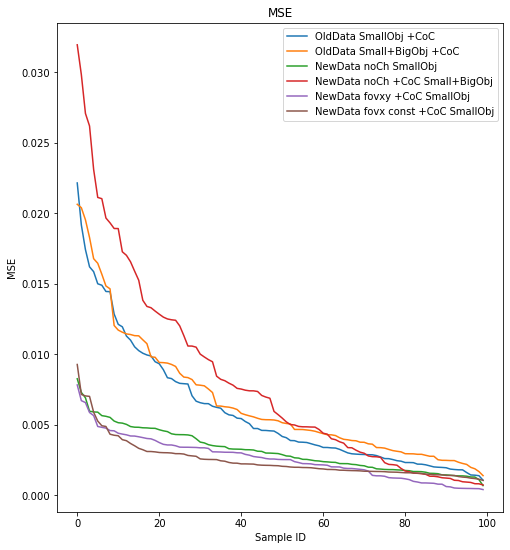

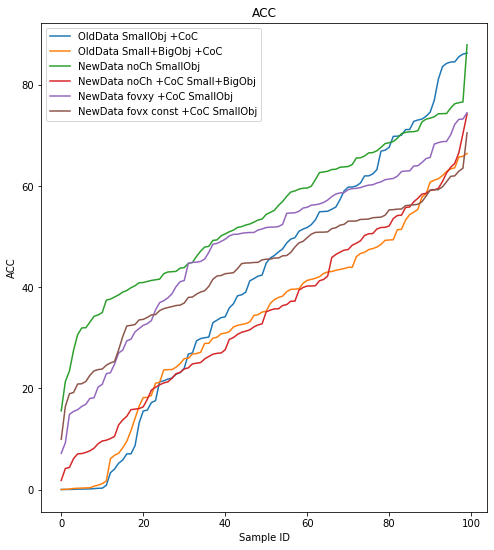

In [9]:
import matplotlib.pyplot as plt
import math

def plot_loss(stats, loss, models=None, labels=None, title=None, sort_loss=False, ylim=None):
    if models is None:
        models = stats[loss].keys()
        
    plt.figure(figsize=[8, 9])
        
    for i, model in enumerate(models):
        losses = stats[loss][model]
        
        if sort_loss:
            losses = [l for l in losses if not math.isnan(l)]
            # print(losses)
            losses = sorted(losses, reverse=loss != "acc")
        
        plt.plot(losses, label=labels[i] if labels is not None else model)
        #plt.xticks(range(len(losses)))
        
    if ylim is not None:
        plt.ylim(top=ylim)
        
    plt.legend()
    plt.title(title if title is not None else loss.upper())
    plt.xlabel("Sample ID")
    plt.ylabel(loss.upper())
 
labels = [
    "OldData SmallObj +CoC",
    "OldData Small+BigObj +CoC",
    "NewData noCh SmallObj",
    "NewData noCh +CoC Small+BigObj",
    "NewData fovxy +CoC SmallObj",
    "NewData fovx const +CoC SmallObj"
] 

plot_loss(stats, "mse", sort_loss=True, labels=labels)
plot_loss(stats, "acc", sort_loss=True, labels=labels)

In [ ]:
stats_files = glob.glob("/home/kevin/Documents/master-thesis/logs/server_tests/test_03-05-2019/*/all_test_stats.json")

stats_bulk = {f.split("/")[-2].split("_", 1)[1]: load_stats_file(f) for f in stats_files}

print(next(iter(stats_bulk.values()))["mse"].keys())
print()
print("Tests:", stats_bulk.keys())

In [ ]:
def plot_stats_bulk(stats_bulk, model, loss="mse", labels=None, title=None, show_leg=True):
    if labels is None:
        labels = {k: k for k in stats_bulk.keys()}
    
    for label, desc in labels.items():
        if isinstance(desc, list):
            desc, color = desc
        else:
            color = ''
        
        #print(stats[loss][model])
        stats = stats_bulk[label]
        
        losses = stats[loss][model]
        losses = [l for l in losses if not math.isnan(l)]
        losses = sorted(losses, reverse=True)
        
        x = np.linspace(0, 1, len(losses))
        
        plt.plot(x, losses, color, label=desc)
        
        if show_leg:
            plt.legend()
        plt.title(title if title is not None else loss.upper())
        plt.xlabel("Sample")
        plt.ylabel(loss.upper())
        plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        #break

plot_stats_bulk(stats_bulk, "0_m94682_ddffnet_lstm_stack_pretrained_testset")

In [ ]:
"""
labels = {
    'art_scene': ['Standard', 'k'], 
    'env_tex': 'Env Tex', 
    'more_tex': 'More Tex', 
    'big_and_less_obj2': 'Big and less obj',
    'noise_tex': 'Using noise tex', 
    'rand_light': 'Random light', 
    'more_mov': 'More movement', 
    'art_scene_noise': 'Image Noise',
    'out_of_foc_range': 'obj: [0.5, 1.5]; focus: [1, 3]',
    'closer_focus_ramp': 'obj: [0.5, 1.5]; focus: [0.5, 1.5]',  
    'obj_out_of_focus_range': 'obj: [1, 3]; focus: [0.5, 1.5]'
}
"""

labels = {    
    'art_scene': ['Standard', 'k'], 
    'art_scene_repeat': 'Giving single frame repeat', 
    'art_scene_zero': 'Giving single frame and zeros',
}

models = {
    "0_m94682_ddffnet_lstm_stack_pretrained_testset": "LSTM Stack",
    "1_m94684_ddffnet_lstm_fc_pretrained_testset": "LSTM FC",
    "2_m94685_poolnet_nopool_layered_sandwitch2_2more_testset": "PoolNet",
    "3_m94688_cocnet_all_big_nopool_layered_testset": "CoCNet",
}

for model, title in models.items():
    plt.figure(figsize=[9, 9])
    plt.ylim(top=0.085)
    plot_stats_bulk(stats_bulk, model, labels=labels, title=title, show_leg=True)